In [18]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

co2_data = pd.read_csv("../../datasets/OWID_emissions.csv")

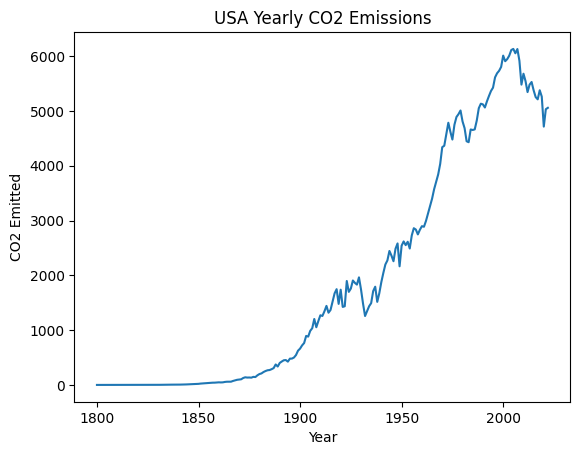

In [24]:
# quick graph of some country data
usa = co2_data[co2_data['iso_code'] == 'USA']
plt.plot(usa['year'], usa['co2'])
plt.ylabel("CO2 Emitted")
plt.xlabel("Year")
plt.title("USA Yearly CO2 Emissions")
plt.show()


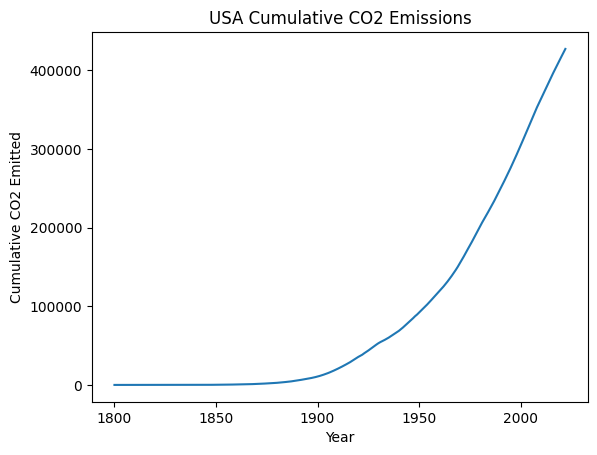

In [25]:
# transform to cumulative sums
# honestly even easier than I expected
co2_data['cumulative_co2'] = co2_data.groupby('iso_code')['co2'].cumsum()
usa = co2_data[co2_data['iso_code'] == 'USA']
plt.plot(zim['year'], zim['cumulative_co2'])
plt.ylabel("Cumulative CO2 Emitted")
plt.xlabel("Year")
plt.title("USA Cumulative CO2 Emissions")
plt.show()

In [29]:
# gridded data transform
import xarray as xr

grid = xr.open_dataset("../../datasets/NOAA_global_temp.nc")
print(grid)

<xarray.Dataset> Size: 22MB
Dimensions:  (time: 2090, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 17kB 1850-01-01 1850-02-01 ... 2024-02-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (time, z, lat, lon) float32 22MB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P174Y2M
    references:                      Vose, R. S., et al., 20

(array([8.800000e+01, 2.649000e+03, 3.917500e+04, 1.100249e+06,
        4.176243e+06, 9.201700e+04, 6.602000e+03, 2.390000e+02,
        1.400000e+01, 4.000000e+00]),
 array([-18.36000061, -13.99500084,  -9.63000011,  -5.26500034,
         -0.89999998,   3.46500015,   7.8300004 ,  12.19500065,
         16.56000137,  20.92500114,  25.29000092]),
 <BarContainer object of 10 artists>)

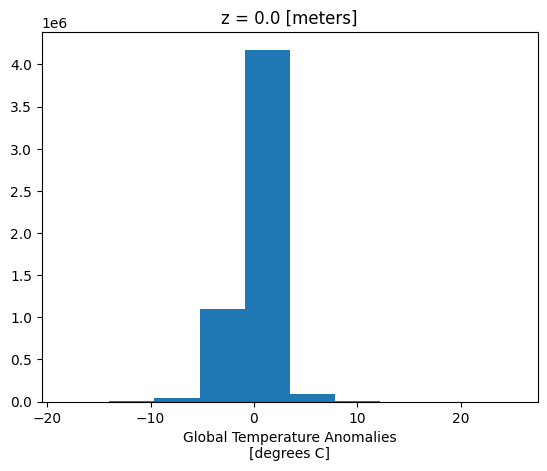

In [30]:
grid['anom'].plot()